In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

In [15]:
# Modification
def leaky_relu(x, alpha=0.01):     # Defining Leaky Relu activation function
    return tf.where(x >= 0, x, alpha * x)

In [16]:
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation=leaky_relu, input_shape=(10,)),
        layers.Dense(20, activation=leaky_relu),
        layers.Dense(1)
    ])
    return model

In [17]:
def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = []
    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f'Epoch {epoch + 1}/{epochs} - {optimizer_name} loss: {loss:.4f}')
    return history

In [18]:
X, y = create_data()

In [19]:
model_sgd = create_model()
model_adam = create_model()

In [20]:
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

In [21]:
epochs = 50
batch_size = 32

In [22]:
print('\nTraining with SGD optimizer: ')
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')


Training with SGD optimizer: 
Epoch 1/50 - SGD loss: 1.0301
Epoch 2/50 - SGD loss: 0.9962
Epoch 3/50 - SGD loss: 0.9801
Epoch 4/50 - SGD loss: 0.9670
Epoch 5/50 - SGD loss: 0.9588
Epoch 6/50 - SGD loss: 0.9527
Epoch 7/50 - SGD loss: 0.9466
Epoch 8/50 - SGD loss: 0.9410
Epoch 9/50 - SGD loss: 0.9371
Epoch 10/50 - SGD loss: 0.9331
Epoch 11/50 - SGD loss: 0.9294
Epoch 12/50 - SGD loss: 0.9254
Epoch 13/50 - SGD loss: 0.9222
Epoch 14/50 - SGD loss: 0.9190
Epoch 15/50 - SGD loss: 0.9156
Epoch 16/50 - SGD loss: 0.9112
Epoch 17/50 - SGD loss: 0.9083
Epoch 18/50 - SGD loss: 0.9062
Epoch 19/50 - SGD loss: 0.9025
Epoch 20/50 - SGD loss: 0.8991
Epoch 21/50 - SGD loss: 0.8979
Epoch 22/50 - SGD loss: 0.8940
Epoch 23/50 - SGD loss: 0.8919
Epoch 24/50 - SGD loss: 0.8892
Epoch 25/50 - SGD loss: 0.8864
Epoch 26/50 - SGD loss: 0.8837
Epoch 27/50 - SGD loss: 0.8820
Epoch 28/50 - SGD loss: 0.8799
Epoch 29/50 - SGD loss: 0.8767
Epoch 30/50 - SGD loss: 0.8732
Epoch 31/50 - SGD loss: 0.8707
Epoch 32/50 - SGD

In [23]:
print('\nTraining with Adam optimizer: ')
adam_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')


Training with Adam optimizer: 
Epoch 1/50 - Adam loss: 1.1054
Epoch 2/50 - Adam loss: 1.0021
Epoch 3/50 - Adam loss: 0.9735
Epoch 4/50 - Adam loss: 0.9536
Epoch 5/50 - Adam loss: 0.9411
Epoch 6/50 - Adam loss: 0.9257
Epoch 7/50 - Adam loss: 0.9129
Epoch 8/50 - Adam loss: 0.9027
Epoch 9/50 - Adam loss: 0.8927
Epoch 10/50 - Adam loss: 0.8838
Epoch 11/50 - Adam loss: 0.8709
Epoch 12/50 - Adam loss: 0.8643
Epoch 13/50 - Adam loss: 0.8530
Epoch 14/50 - Adam loss: 0.8457
Epoch 15/50 - Adam loss: 0.8374
Epoch 16/50 - Adam loss: 0.8302
Epoch 17/50 - Adam loss: 0.8211
Epoch 18/50 - Adam loss: 0.8124
Epoch 19/50 - Adam loss: 0.8071
Epoch 20/50 - Adam loss: 0.7960
Epoch 21/50 - Adam loss: 0.7900
Epoch 22/50 - Adam loss: 0.7844
Epoch 23/50 - Adam loss: 0.7762
Epoch 24/50 - Adam loss: 0.7656
Epoch 25/50 - Adam loss: 0.7585
Epoch 26/50 - Adam loss: 0.7511
Epoch 27/50 - Adam loss: 0.7435
Epoch 28/50 - Adam loss: 0.7376
Epoch 29/50 - Adam loss: 0.7287
Epoch 30/50 - Adam loss: 0.7267
Epoch 31/50 - Ada

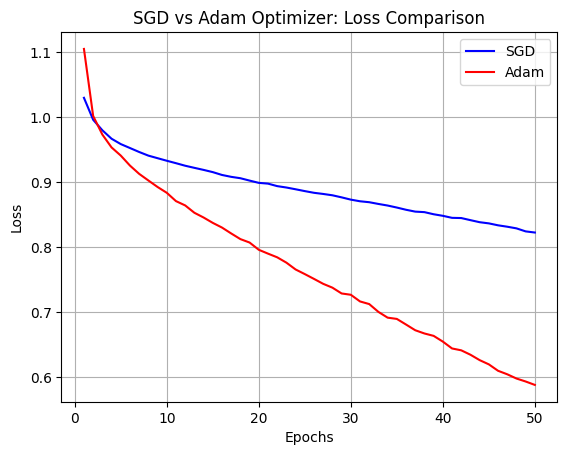

In [24]:
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='red')
plt.title('SGD vs Adam Optimizer: Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()